In [20]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data, paths,labels
!date -I

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-05-13


In [21]:
df_dice_schaefer = pd.read_csv( 
    data.path('interim/DICE_Glasser_Schaefer200_res-1x1x1.csv'),
    index_col=0
)

df_dice_yeo = pd.read_csv( 
    data.path('interim/DICE_Glasser_Yeo17_res-1x1x1.csv'),
    index_col=0
)

set(df_dice_schaefer.index) == set(df_dice_yeo.index)

True

In [22]:
len(list(df_dice_schaefer.index))

360

<Axes: ylabel='regionName'>

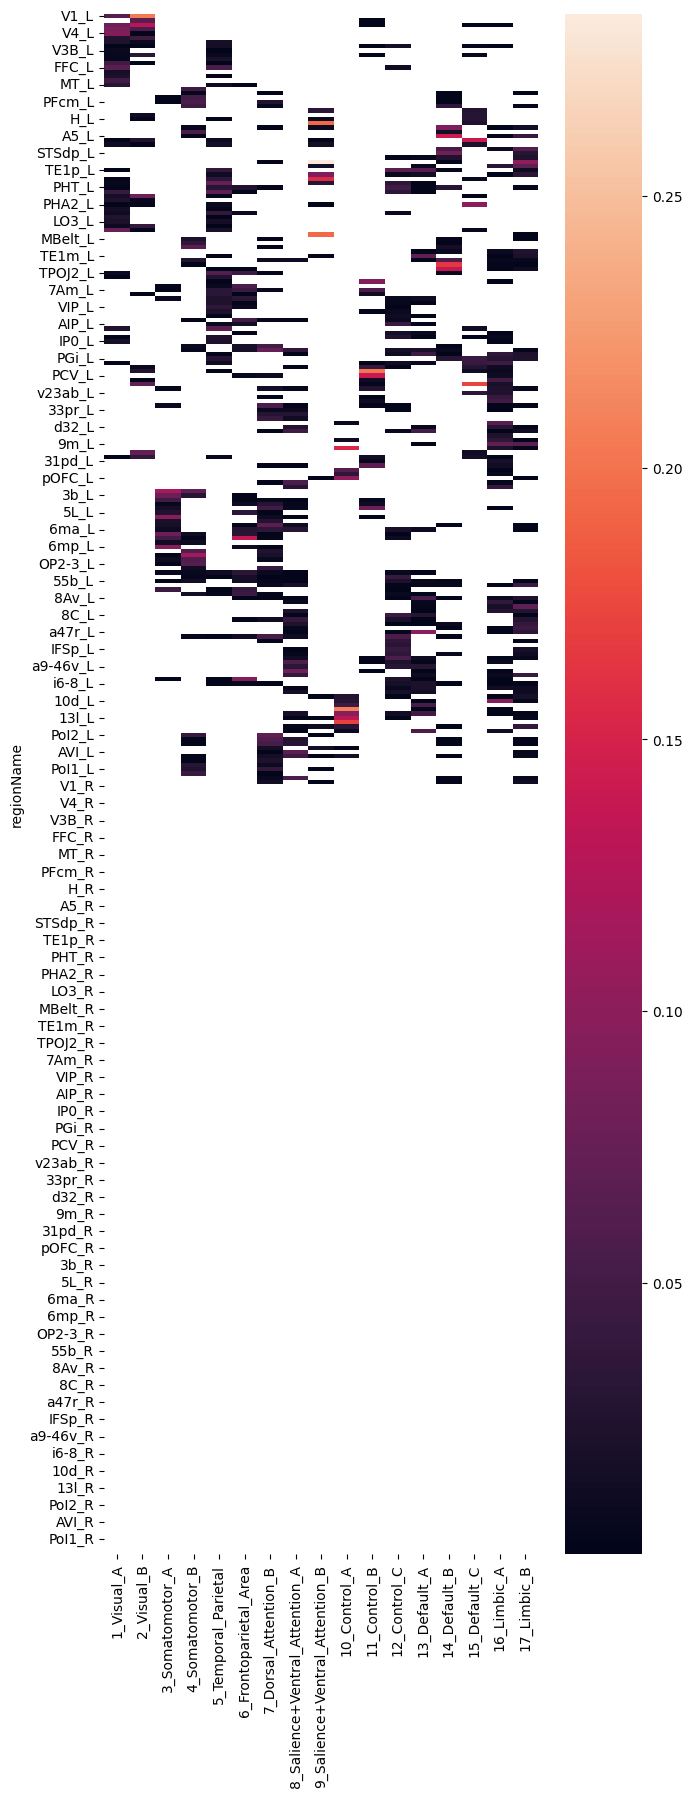

In [23]:
fig, ax = plt.subplots(figsize=(7,20))
sns.heatmap(df_dice_yeo, mask=df_dice_yeo == 0.0, ax=ax)

<Axes: ylabel='regionName'>

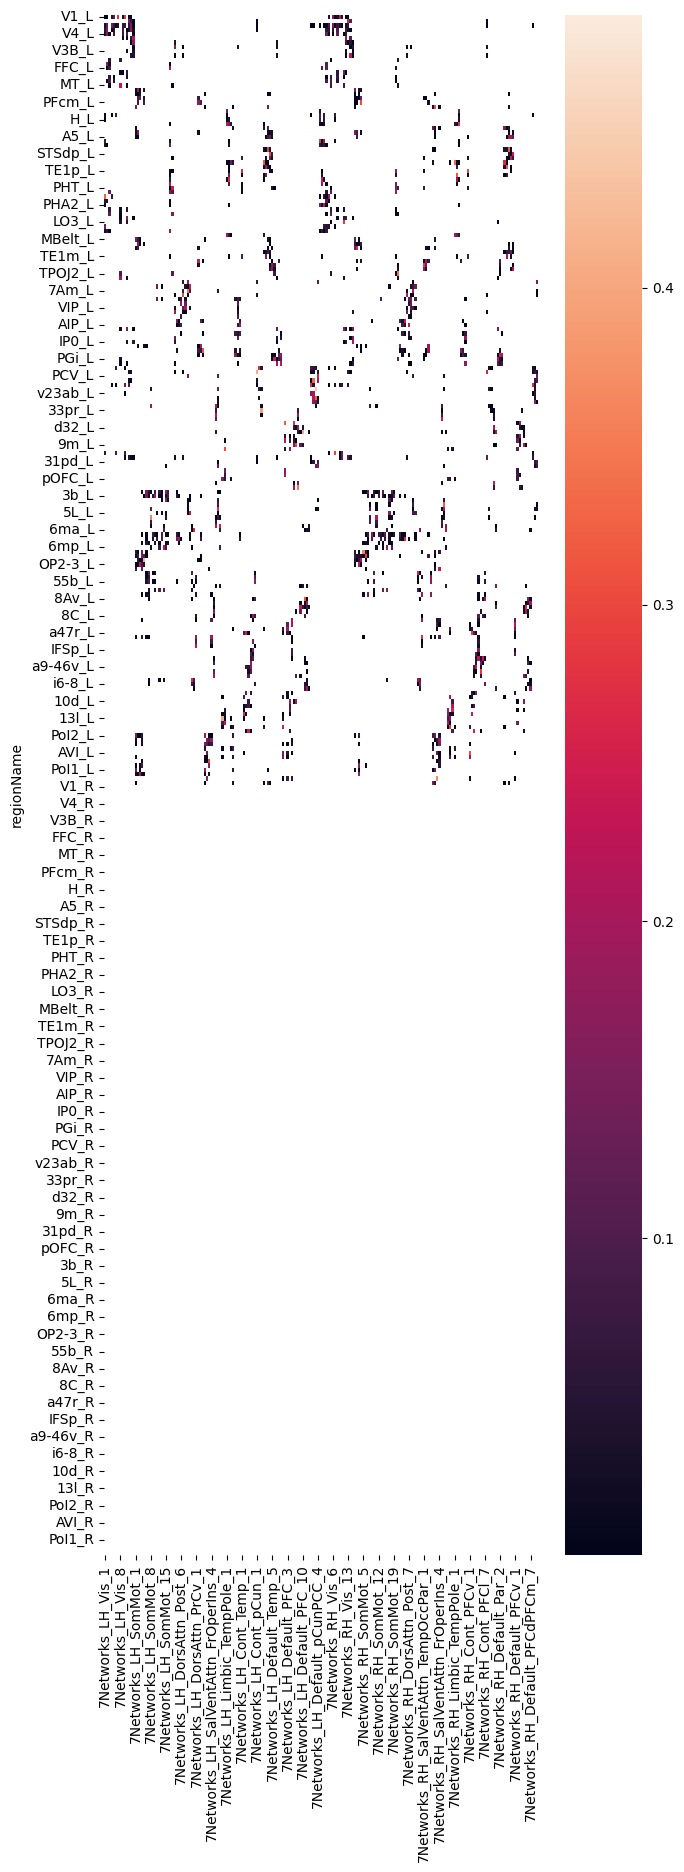

In [24]:
fig, ax = plt.subplots(figsize=(7,20))
sns.heatmap(df_dice_schaefer, mask=df_dice_schaefer == 0.0, ax=ax)

In [25]:
n_rows = len(df_dice_schaefer)

left_cols = list(df_dice_schaefer.columns[:len(df_dice_schaefer.columns)//2])
right_cols = list(df_dice_schaefer.columns[len(df_dice_schaefer.columns)//2:])

left_mapping = list(df_dice_schaefer[left_cols].idxmax(axis=1))[:n_rows//2]
right_mapping = list(df_dice_schaefer[right_cols].idxmax(axis=1))[:n_rows//2]

df_dice_schaefer["Schaefer200"] = right_mapping+left_mapping
df_dice_schaefer[["Schaefer200"]]

/tmp/ipykernel_14956/1313950768.py:6: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  left_mapping = list(df_dice_schaefer[left_cols].idxmax(axis=1))[:n_rows//2]
/tmp/ipykernel_14956/1313950768.py:7: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  right_mapping = list(df_dice_schaefer[right_cols].idxmax(axis=1))[:n_rows//2]


,Schaefer200
regionName,
V1_L,7Networks_RH_Vis_9
V6_L,7Networks_RH_Vis_13
V2_L,7Networks_RH_Vis_6
V3_L,7Networks_RH_Vis_8
V4_L,7Networks_RH_Vis_3
...,...
FOP2_R,7Networks_LH_SalVentAttn_FrOperIns_3
PoI1_R,7Networks_LH_SalVentAttn_FrOperIns_1
Ig_R,7Networks_LH_SomMot_3


In [26]:
df_dice_yeo["Yeo17"] = list(df_dice_yeo.idxmax(axis=1)[:len(df_dice_yeo)//2])*2
df_dice_yeo[["Yeo17"]]

/tmp/ipykernel_14956/2544112948.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df_dice_yeo["Yeo17"] = list(df_dice_yeo.idxmax(axis=1)[:len(df_dice_yeo)//2])*2


,Yeo17
regionName,
V1_L,2_Visual_B
V6_L,2_Visual_B
V2_L,2_Visual_B
V3_L,1_Visual_A
V4_L,1_Visual_A
...,...
FOP2_R,4_Somatomotor_B
PoI1_R,7_Dorsal_Attention_B
Ig_R,4_Somatomotor_B


In [27]:
len(set(df_dice_schaefer.index))

360

In [28]:
len(list(df_dice_schaefer.index))

360

In [29]:
df_dice = pd.merge(df_dice_yeo[["Yeo17"]],df_dice_schaefer[["Schaefer200"]],on="regionName")
df_dice

,Yeo17,Schaefer200
regionName,,
V1_L,2_Visual_B,7Networks_RH_Vis_9
V6_L,2_Visual_B,7Networks_RH_Vis_13
V2_L,2_Visual_B,7Networks_RH_Vis_6
V3_L,1_Visual_A,7Networks_RH_Vis_8
V4_L,1_Visual_A,7Networks_RH_Vis_3
...,...,...
FOP2_R,4_Somatomotor_B,7Networks_LH_SalVentAttn_FrOperIns_3
PoI1_R,7_Dorsal_Attention_B,7Networks_LH_SalVentAttn_FrOperIns_1
Ig_R,4_Somatomotor_B,7Networks_LH_SomMot_3


In [30]:
df_glasser = pd.read_csv(data.path('external/glasser_parcellation_centriods/HCP-MMP1_UniqueRegionList.csv'))
df_glasser

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
0,V1_L,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717
1,MST_L,Medial_Superior_Temporal_Area_L,2_L,L,MST,Occ,MT+_Complex_and_Neighboring_Visual_Areas,2,5,132.416667,58.901786,82.059524,336
2,V6_L,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009
3,V2_L,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220
4,V3_L,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,STSva_R,Area_STSv_anterior_R,376_R,R,STSva,Temp,Auditory_Association,376,11,32.924419,117.527907,54.337791,1720
356,TE1m_R,Area_TE1_Middle_R,377_R,R,TE1m,Temp,Lateral_Temporal,377,14,26.146605,102.236497,53.246528,2592
357,PI_R,Para-Insular_Area_R,378_R,R,PI,Temp,Insular_and_Frontal_Opercular,378,12,47.013363,123.157016,57.926503,898
358,a32pr_R,Area_anterior_32_prime_R,379_R,R,a32pr,Fr,Anterior_Cingulate_and_Medial_Prefrontal,379,19,81.723096,153.990326,102.516324,827


In [31]:
set(df_glasser["regionName"]) == set(df_dice.index)

False

In [32]:
set(df_glasser["regionName"]) - set(df_dice.index), set(df_dice.index) - set(df_glasser["regionName"])

({'7Pl_L', '7Pl_R'}, {'7PL_L', '7PL_R'})

In [33]:
df_glasser.replace({'regionName':{'7Pl_L':'7PL_L', '7Pl_R':'7PL_R'}},inplace=True)

In [34]:
set(df_glasser["regionName"]) == set(df_dice.index)

True

In [35]:
merged = pd.merge(df_dice,df_glasser,on="regionName")
merged

,regionName,Yeo17,Schaefer200,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
0,V1_L,2_Visual_B,7Networks_RH_Vis_9,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717
1,V6_L,2_Visual_B,7Networks_RH_Vis_13,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009
2,V2_L,2_Visual_B,7Networks_RH_Vis_6,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220
3,V3_L,1_Visual_A,7Networks_RH_Vis_8,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994
4,V4_L,1_Visual_A,7Networks_RH_Vis_3,Fourth_Visual_Area_L,6_L,L,V4,Occ,Early_Visual,6,2,120.481621,41.344329,69.955702,3183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,FOP2_R,4_Somatomotor_B,7Networks_LH_SalVentAttn_FrOperIns_3,Frontal_Opercular_Area_2_R,315_R,R,FOP2,Ins,Insular_and_Frontal_Opercular,315,12,49.524038,122.612981,86.716346,416
356,PoI1_R,7_Dorsal_Attention_B,7Networks_LH_SalVentAttn_FrOperIns_1,Area_Posterior_Insular_1_R,367_R,R,PoI1,Ins,Insular_and_Frontal_Opercular,367,12,52.456420,115.341143,68.178069,1067
357,Ig_R,4_Somatomotor_B,7Networks_LH_SomMot_3,Insular_Granular_Complex_R,368_R,R,Ig,Ins,Insular_and_Frontal_Opercular,368,12,54.984127,112.083900,86.482993,441
358,FOP5_R,8_Salience+Ventral_Attention_A,7Networks_LH_SalVentAttn_FrOperIns_2,Area_Frontal_Opercular_5_R,369_R,R,FOP5,Ins,Insular_and_Frontal_Opercular,369,12,53.738178,153.878893,75.189158,867


In [36]:
df_glasser.replace({'regionName':{'7PL_L':'7Pl_L', '7PL_R':'7Pl_R'}},inplace=True)

In [37]:
merged.to_csv(data.path('interim/DICE_Glasser_Yeo17_Schaefer200_labelMapping.csv'))